In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [173]:
df=pd.read_excel('cancer patient data sets.xlsx')
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [174]:
df.shape

(1000, 25)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [176]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [177]:
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [178]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [179]:
df.duplicated().sum()

0

In [180]:
df.nunique()

Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [181]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [182]:
df.drop(columns=['Patient Id'], inplace=True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# EDA (Exploratory Data Analysis)

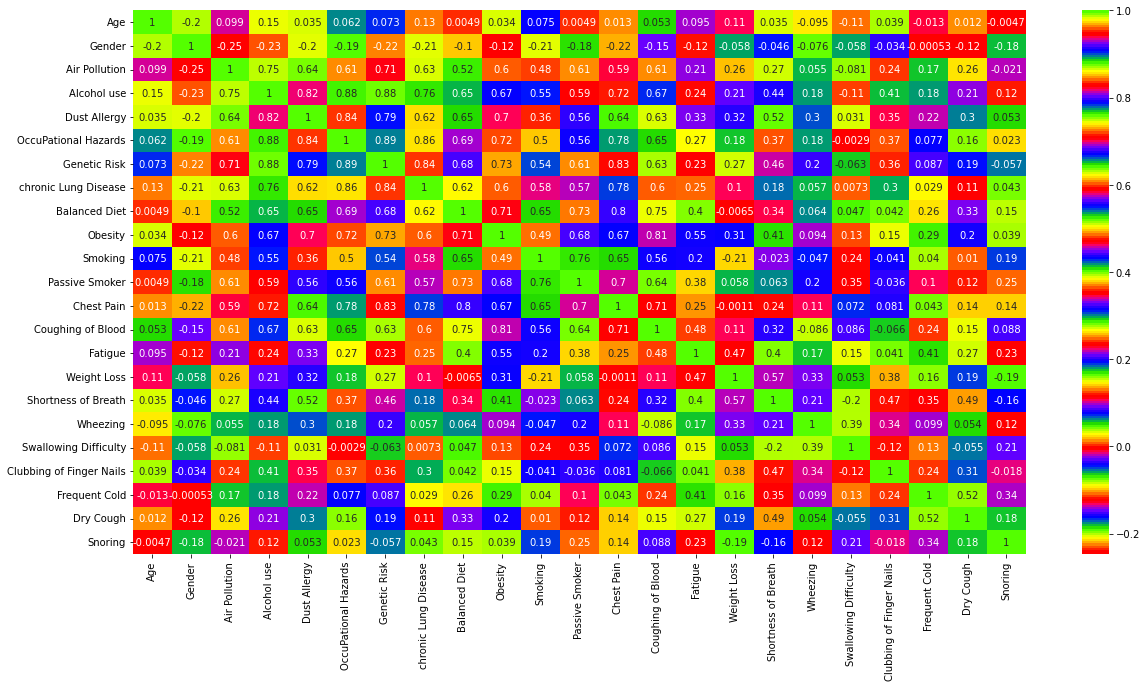

In [183]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='prism')
plt.show()

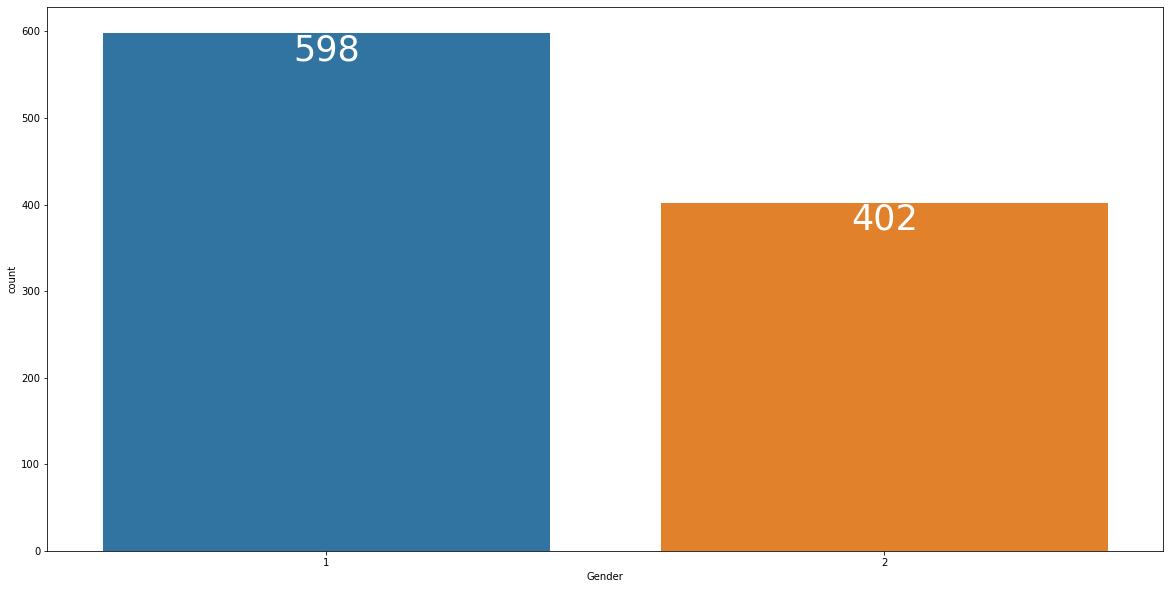

In [184]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df['Gender'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+0.4, p.get_height()), ha='center', va='top', color='#ffffff', size=35)
plt.show()

In [185]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

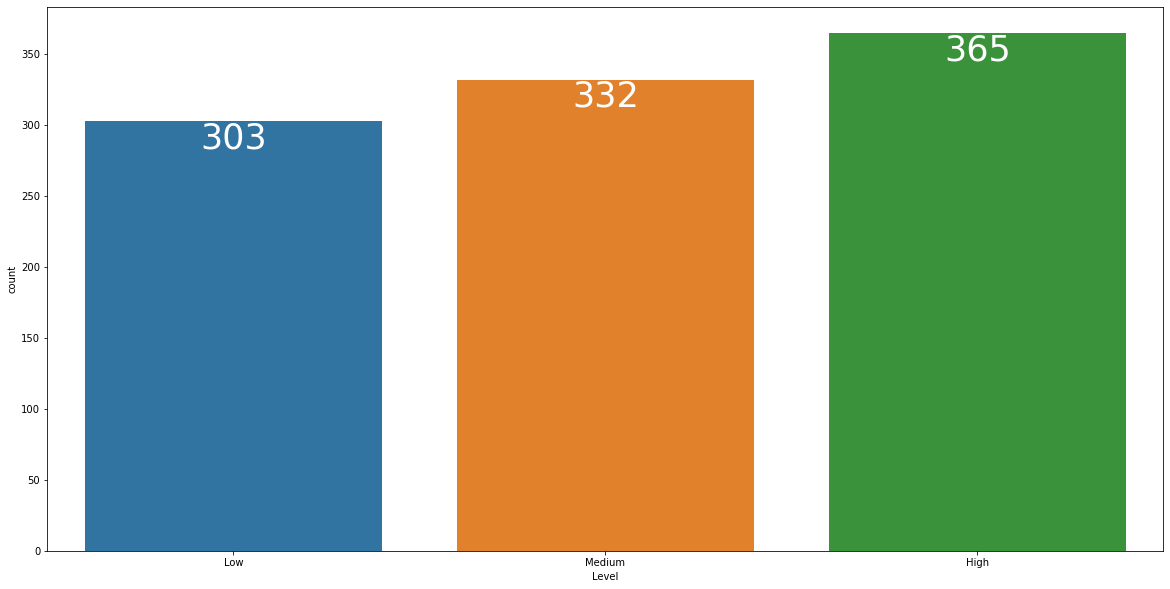

In [186]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df['Level'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+0.4, p.get_height()), ha='center', va='top', color='#ffffff', size=35)
plt.show()

In [187]:
len(df.columns)

24

In [188]:
def myplot(name):
    colors=['r','g','b','k','c','m','y','c','m','y','r','g','b','k','c','m','y','c','m','y','r','g','b','k']
    for i in range(0,len(df.columns)-1,3):
        plt.figure(figsize=(25,40))
        if name=='hist':
            plt.subplot(8,3,i+1)
            ax=df[df.columns[i]].hist(color=colors[i])
            ax.set_title(df.columns[i])
            plt.subplot(8,3,i+2)
            ax=df[df.columns[i+1]].hist(color=colors[i+1])
            ax.set_title(df.columns[i+1])
            plt.subplot(8,3,i+3)
            ax=df[df.columns[i+2]].hist(color=colors[i+2])
            ax.set_title(df.columns[i+2])
        if name=='box':
            plt.subplot(8,3,i+1)
            ax=sns.boxplot(df[df.columns[i]], color=colors[i])
            ax.set_title(df.columns[i])
            plt.subplot(8,3,i+2)
            ax=sns.boxplot(df[df.columns[i+1]], color=colors[i+1])
            ax.set_title(df.columns[i+1])
            plt.subplot(8,3,i+3)
            ax=sns.boxplot(df[df.columns[i]], color=colors[i+2])
            ax.set_title(df.columns[i+2])
        if name=='scatter':
            plt.subplot(8,3,i+1)
            ax=sns.scatterplot(data=df,x=df.columns[i],y=df.columns[i+1],hue='Level')
            title=df.columns[i],'and',df.columns[i+1]
            ax.set_title(title)
            plt.subplot(8,3,i+2)
            ax=sns.scatterplot(data=df,x=df.columns[i],y=df.columns[i+2],hue='Level')
            title=df.columns[i],df.columns[i+2]
            ax.set_title(title)
            plt.subplot(8,3,i+3)
            ax=sns.scatterplot(data=df,x=df.columns[i+1],y=df.columns[i+2],hue='Level')
            title=df.columns[i+1],'and',df.columns[i+2]
            ax.set_title(title)
        if name=='dis':
            plt.subplot(8,3,i+1)
            ax=sns.distplot(df[df.columns[i]], color=colors[i])
            ax.set_title(df.columns[i])
            plt.subplot(8,3,i+2)
            ax=sns.distplot(df[df.columns[i+1]], color=colors[i+1])
            ax.set_title(df.columns[i+1])
            plt.subplot(8,3,i+3)
            try:
                ax=sns.distplot(df[df.columns[i+2]], color=colors[i+2])
                ax.set_title(df.columns[i+2])
            except:
                le=LabelEncoder()
                ax=sns.distplot(le.fit_transform(df[df.columns[i+2]]), color=colors[1+2])
                ax.set_title(df.columns[i+2])
plt.show()

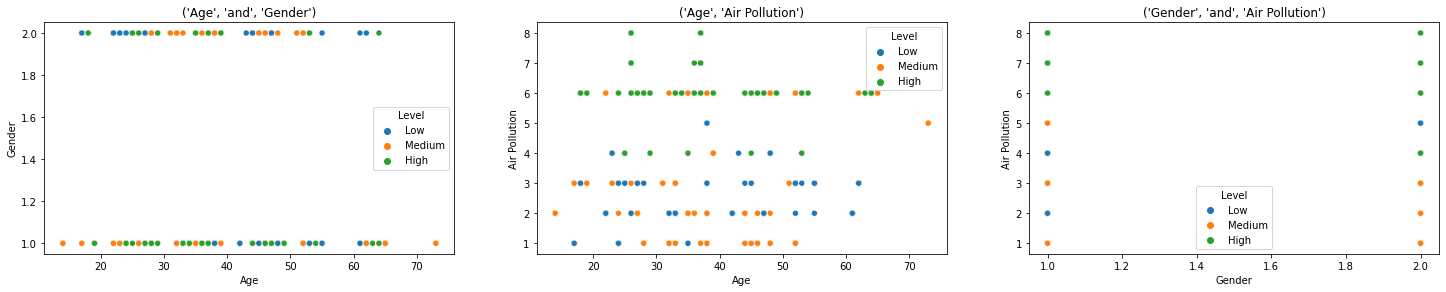

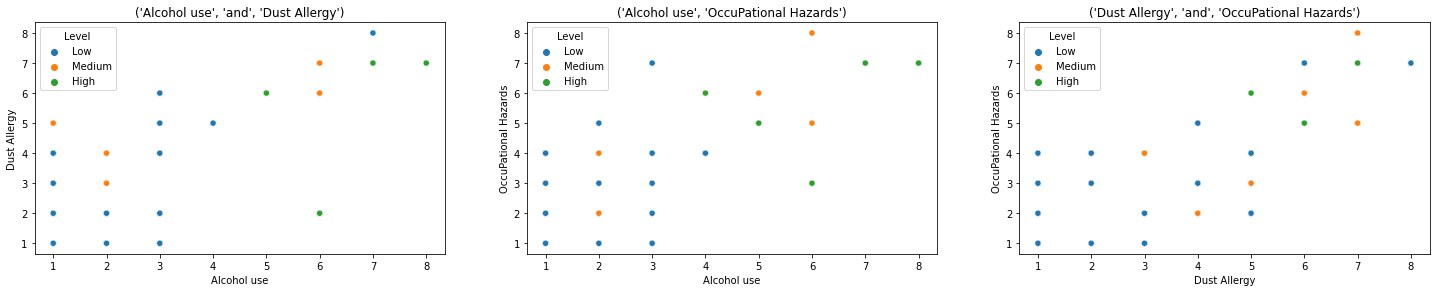

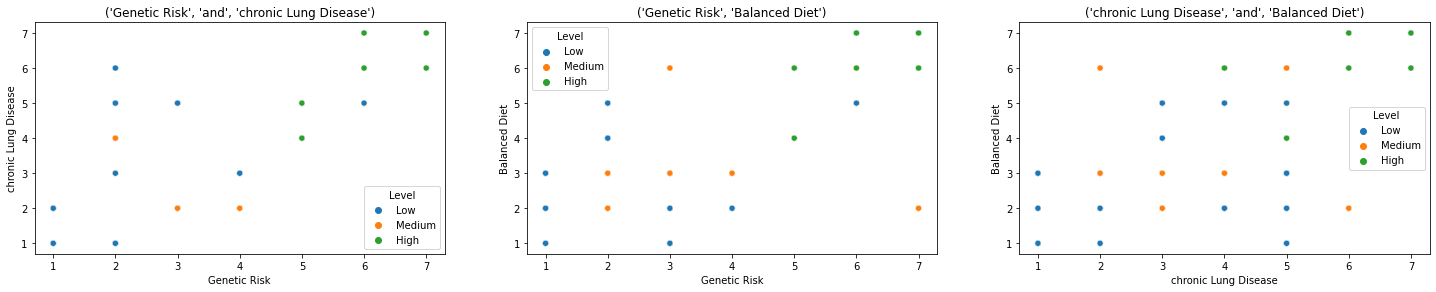

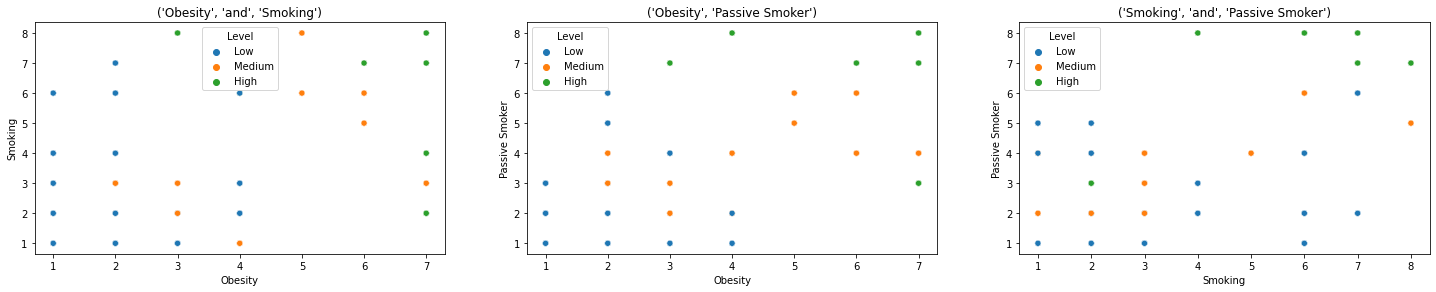

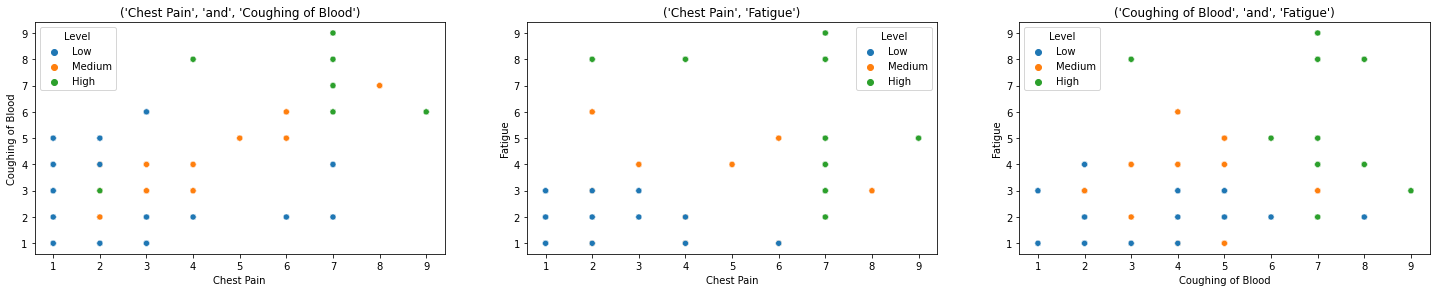

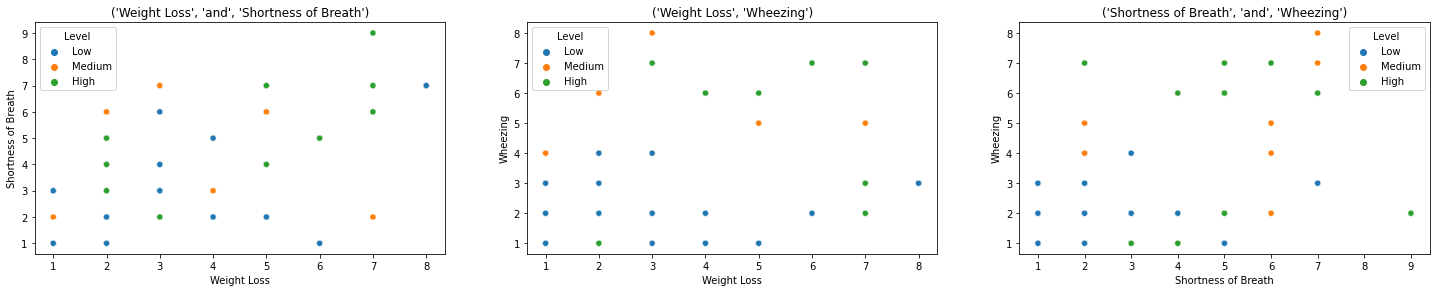

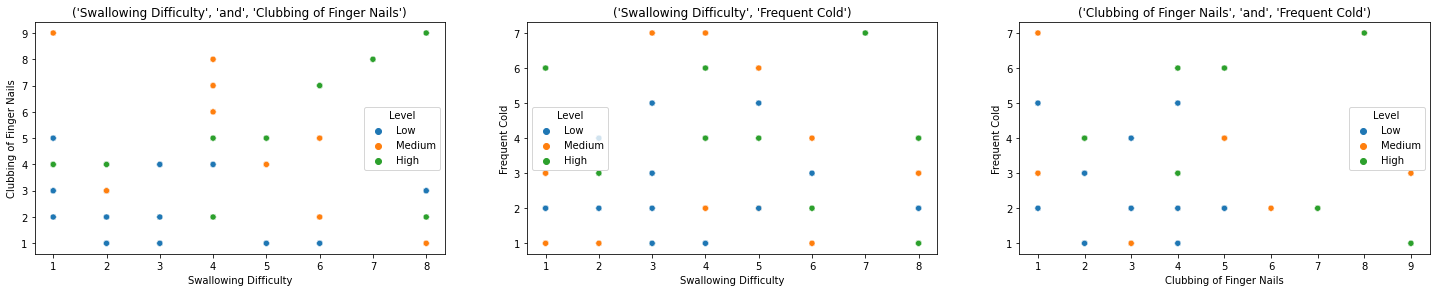

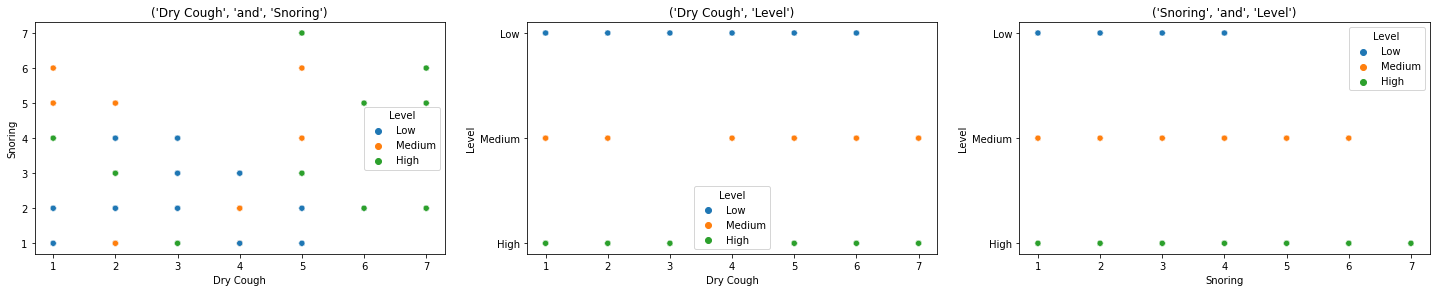

In [189]:
myplot('scatter')

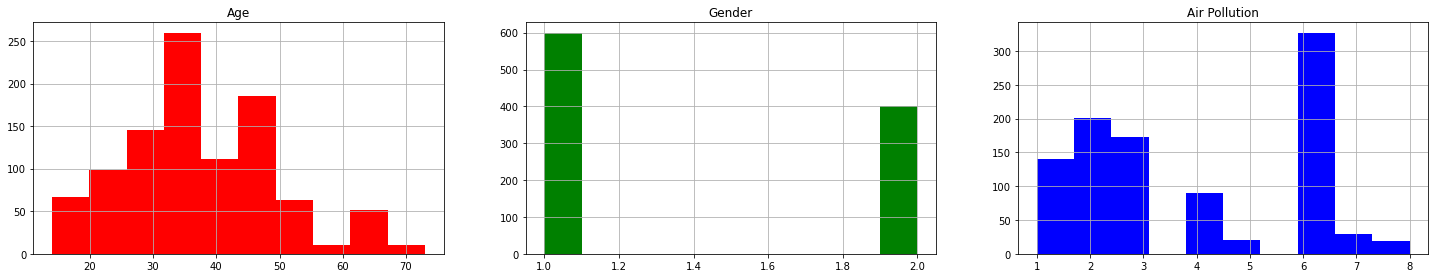

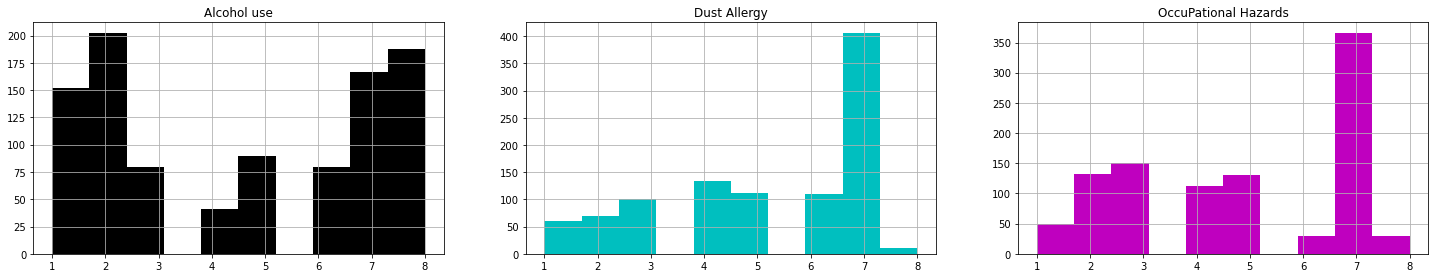

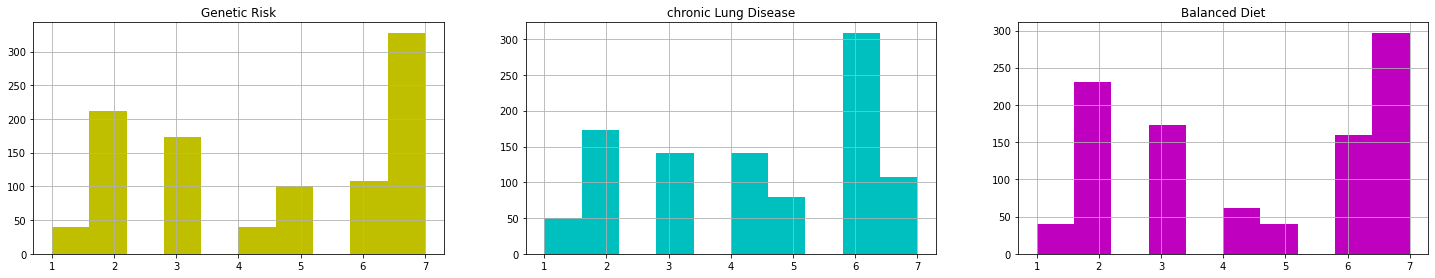

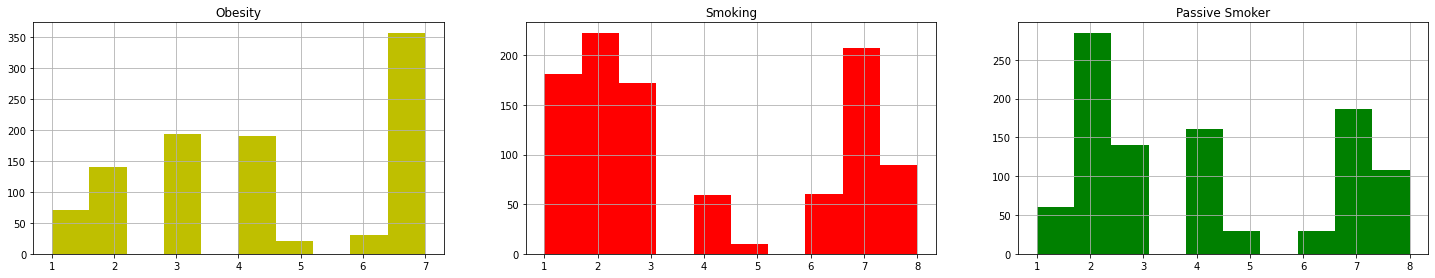

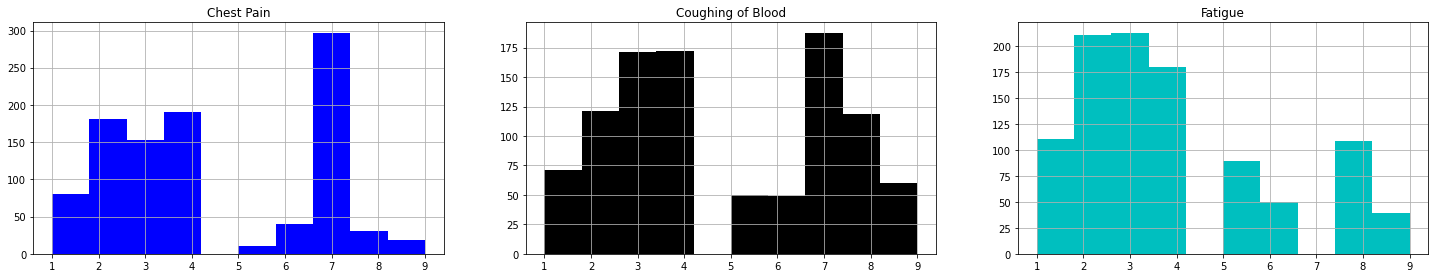

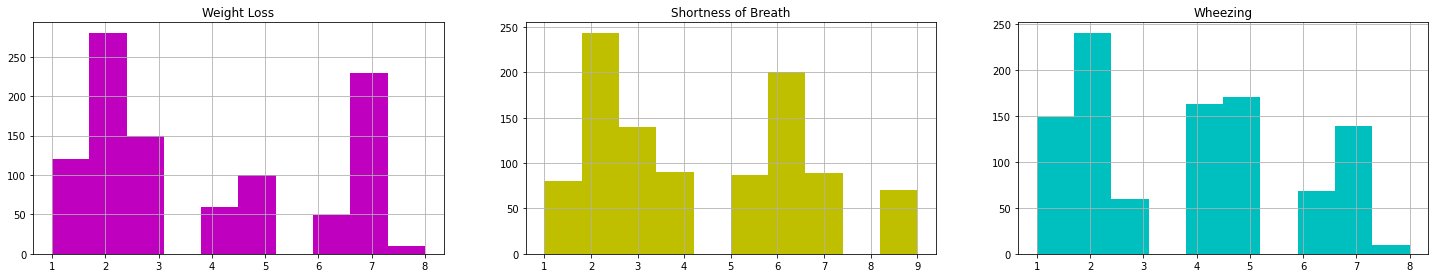

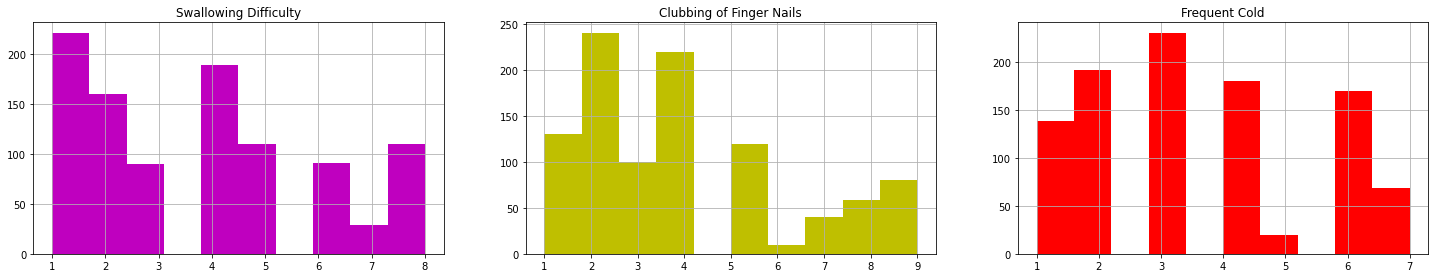

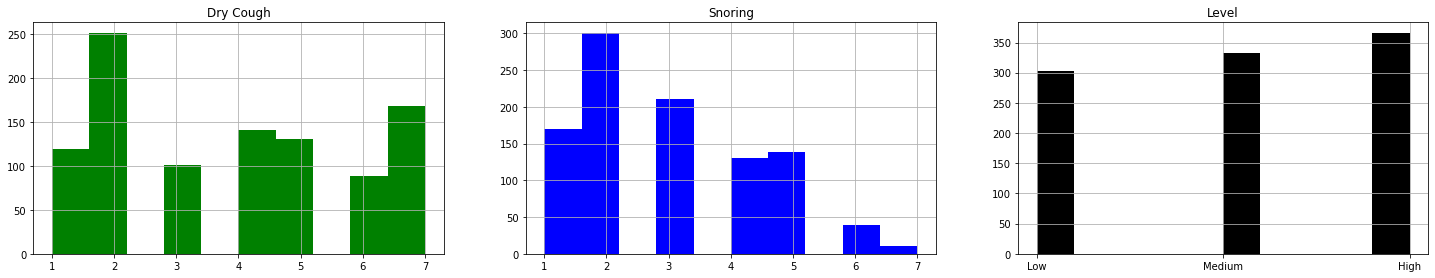

In [190]:
myplot('hist')

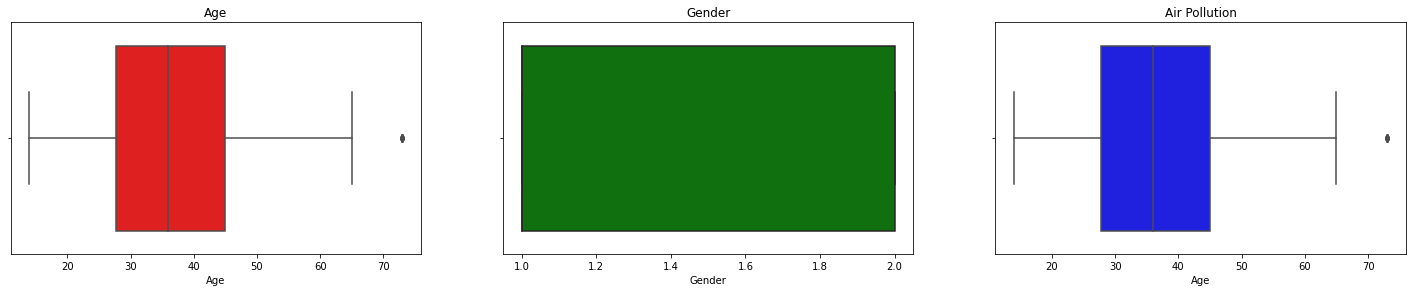

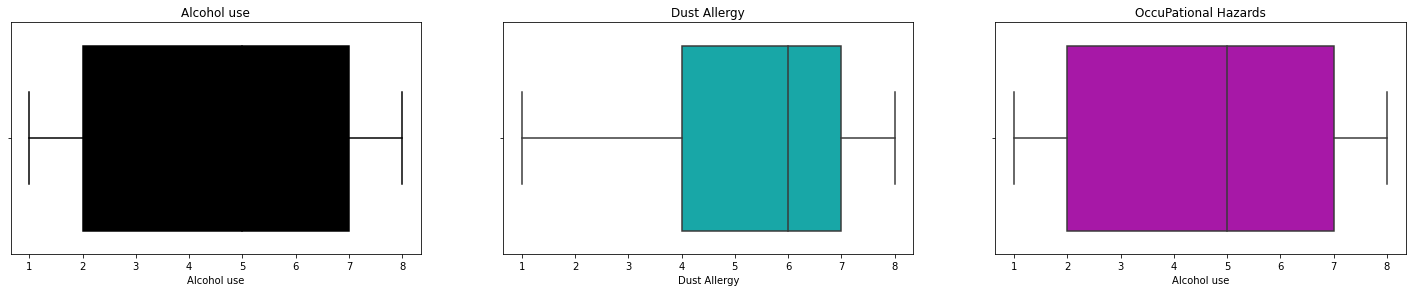

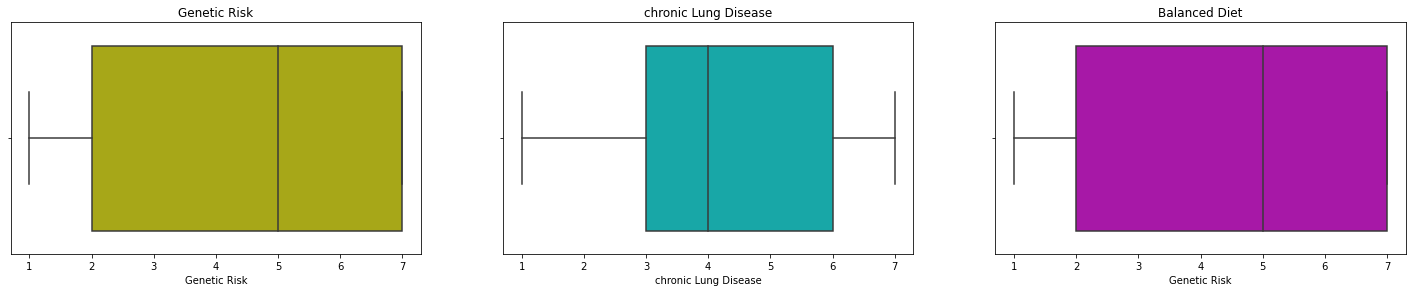

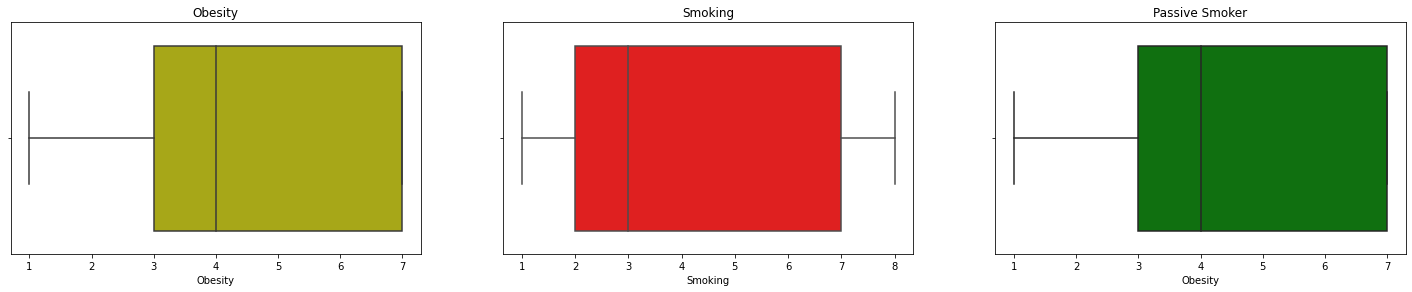

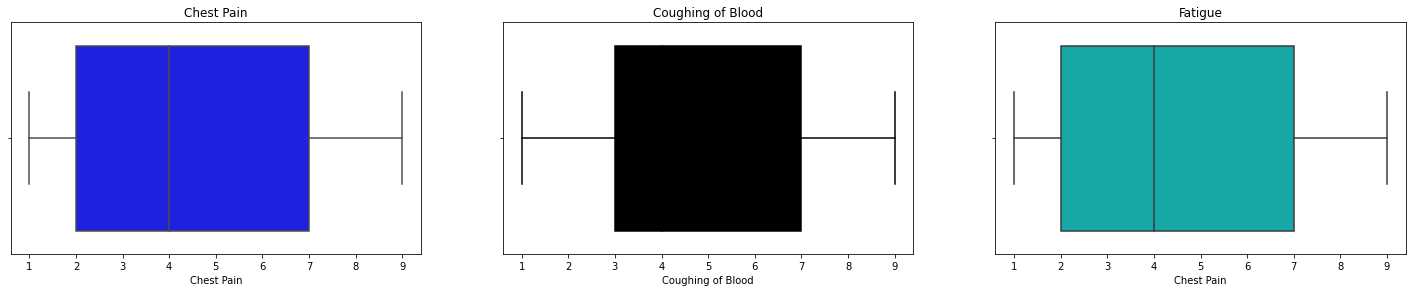

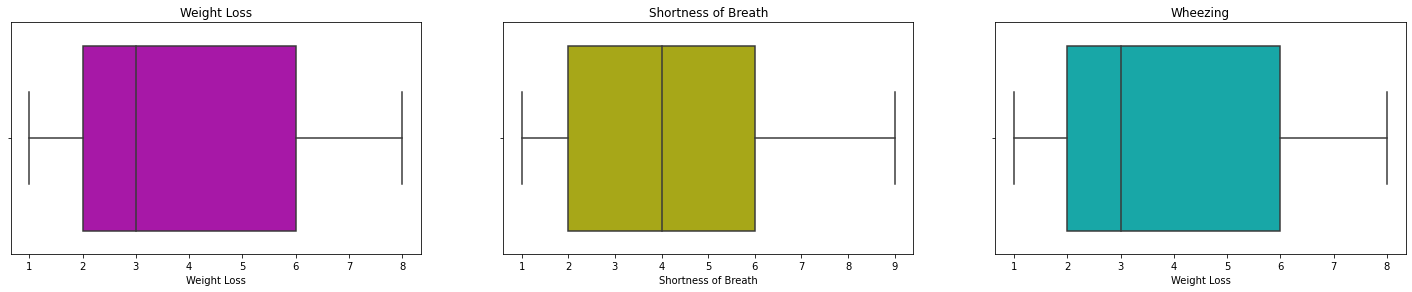

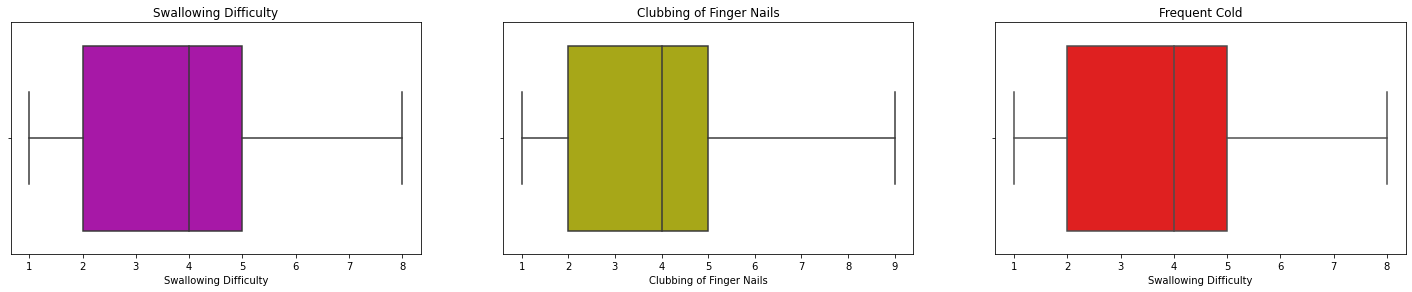

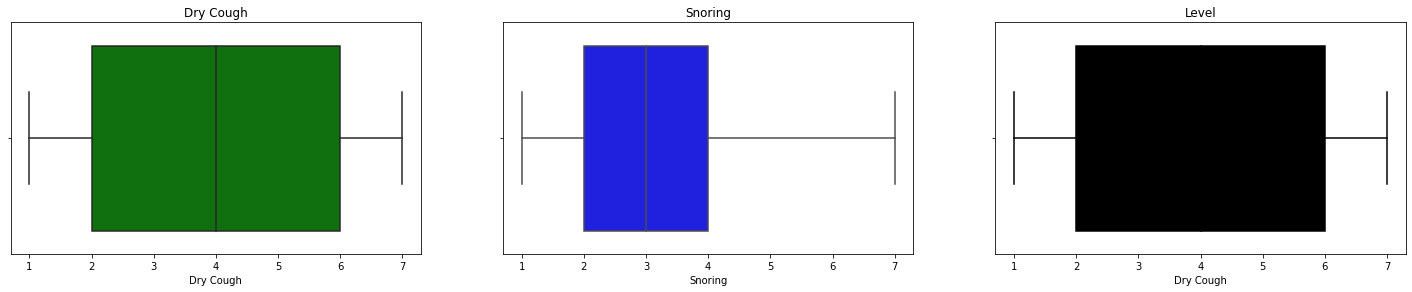

In [191]:
myplot('box')

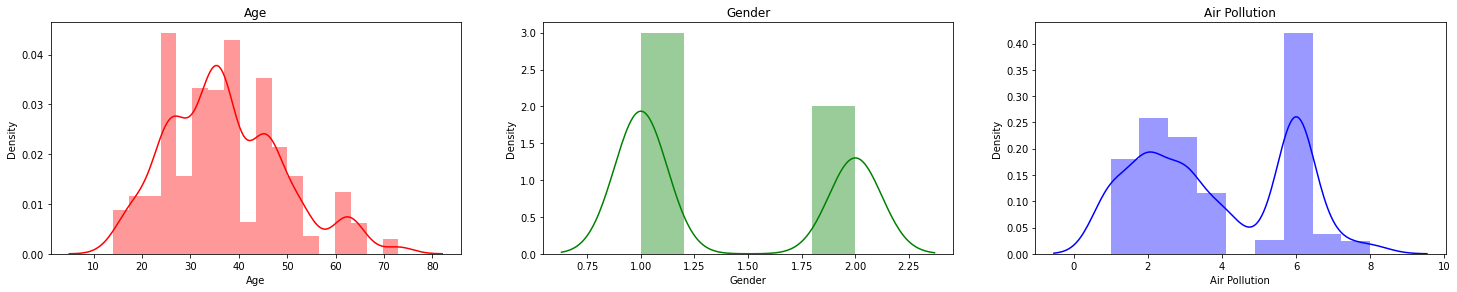

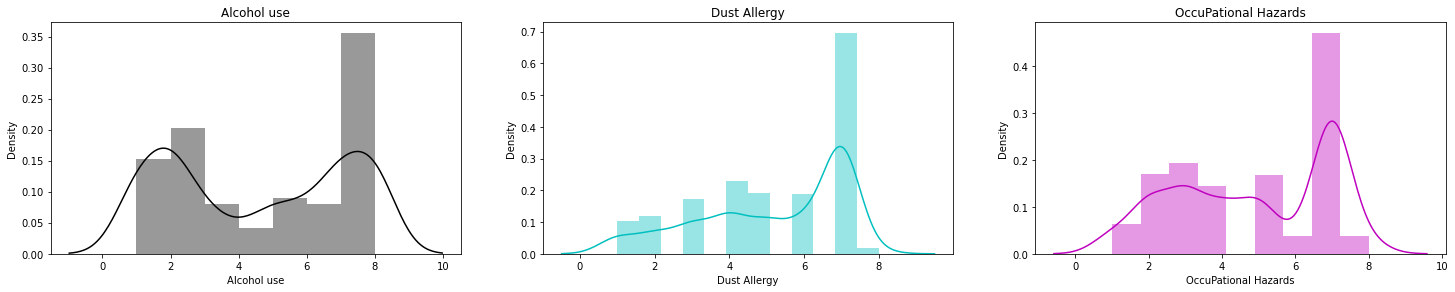

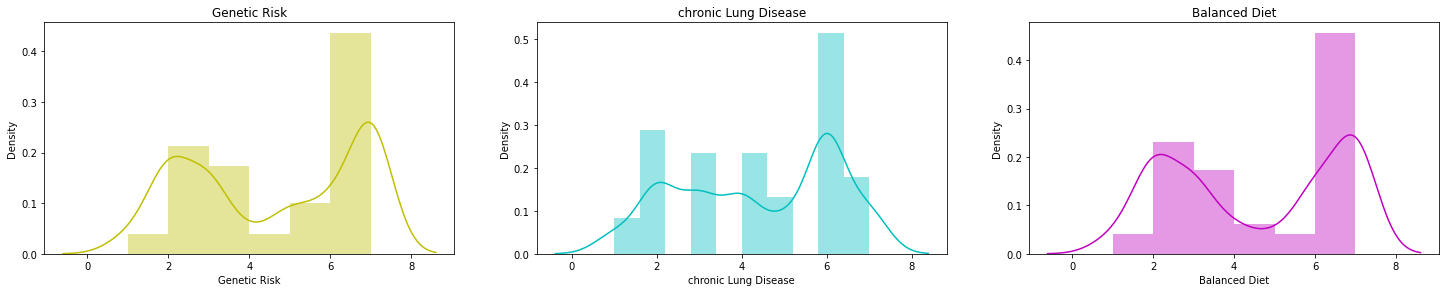

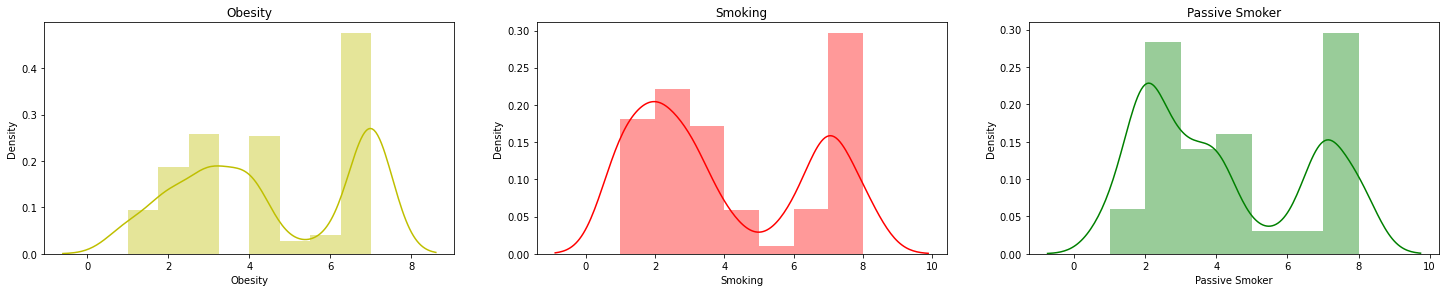

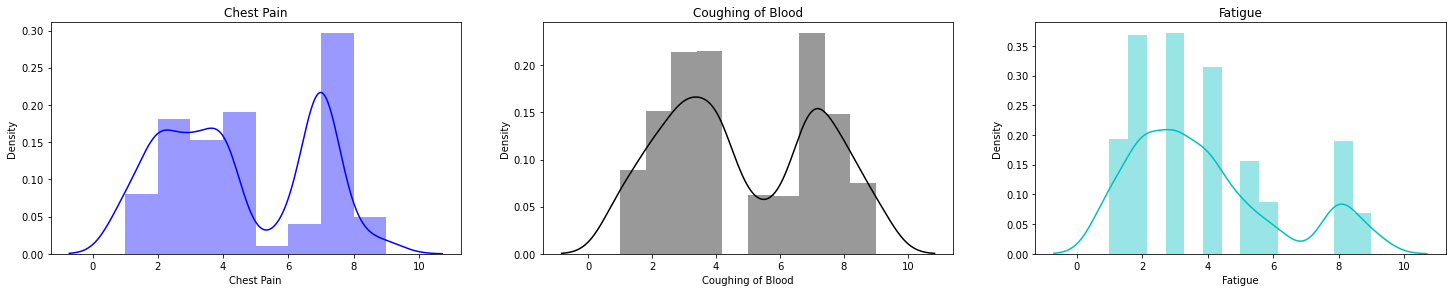

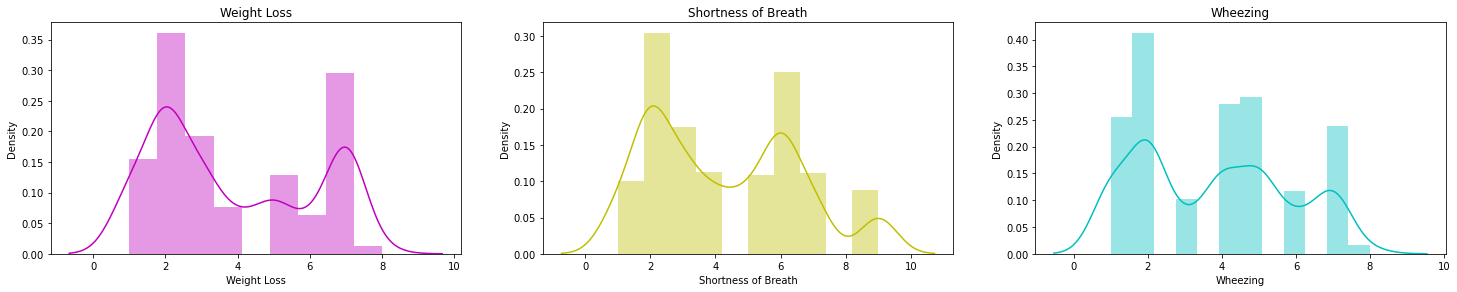

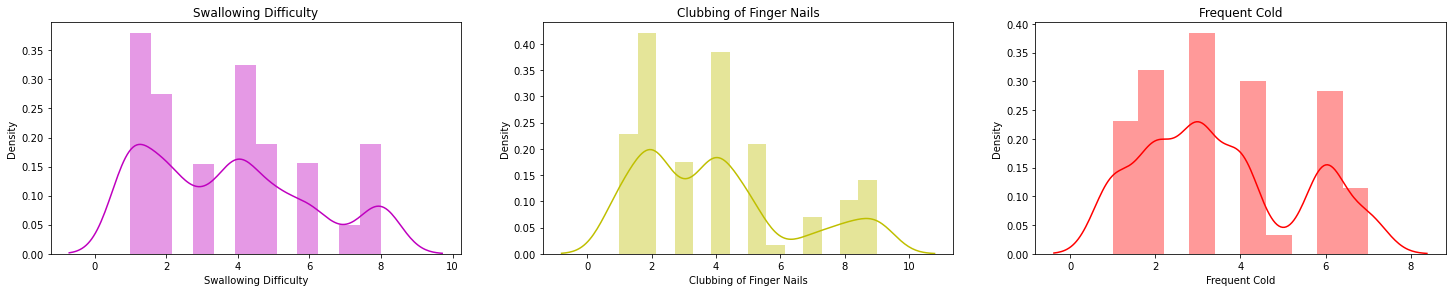

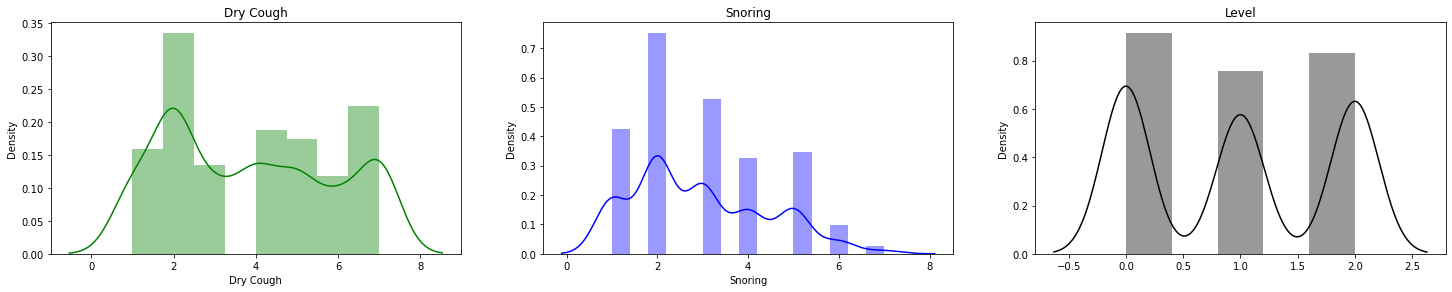

In [192]:
myplot('dis')

In [193]:
x=df.iloc[:,:-1]
x.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [194]:
y=df.iloc[:,-1:]
y.head()

,Level
0,Low
1,Medium
2,High
3,High
4,High


In [195]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=42)
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 24)
(750, 23)
(250, 23)
(750, 1)
(250, 1)


<h1><font color='blue'>Logistic Regression</font></h1>

In [196]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [197]:
lr_train_pred=lr.predict(X_train)
lr_test_pred=lr.predict(X_test)
lr_train_pred=lr.predict(X_train)
lr_test_pred=lr.predict(X_test)
lr_train_accuracy=accuracy_score(y_train, lr_train_pred)
lr_test_accuracy=accuracy_score(y_test, lr_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", lr_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", lr_test_accuracy)

Training Accuracy of Logistic Regression Model is:  0.9973333333333333
Testing Accuracy of Logistic Regression Model is:  0.996


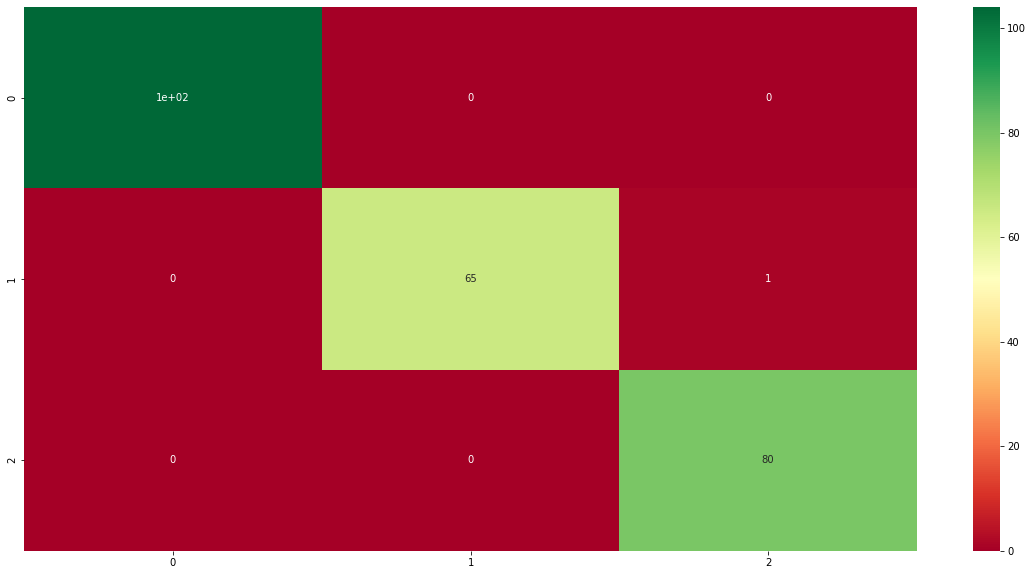

In [198]:
cm=confusion_matrix(y_test, lr_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [199]:
cr=classification_report(y_test, lr_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      0.98      0.99        66
      Medium       0.99      1.00      0.99        80

    accuracy                           1.00       250
   macro avg       1.00      0.99      1.00       250
weighted avg       1.00      1.00      1.00       250



<h1><font color='blue'>Support Vector Classsifier</font></h1>

In [200]:
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [201]:
sv_train_pred=sv.predict(X_train)
sv_test_pred=sv.predict(X_test)
sv_train_pred=sv.predict(X_train)
sv_test_pred=sv.predict(X_test)
sv_train_accuracy=accuracy_score(y_train, sv_train_pred)
sv_test_accuracy=accuracy_score(y_test, sv_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", sv_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", sv_test_accuracy)

Training Accuracy of Logistic Regression Model is:  0.972
Testing Accuracy of Logistic Regression Model is:  0.964


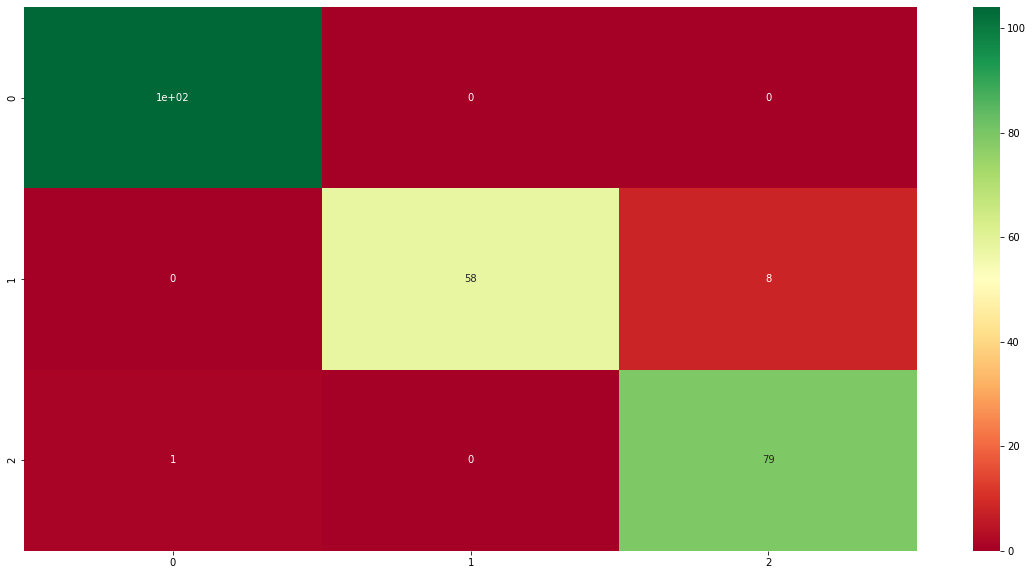

In [202]:
cm=confusion_matrix(y_test, sv_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [203]:
cr=classification_report(y_test, sv_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       0.99      1.00      1.00       104
         Low       1.00      0.88      0.94        66
      Medium       0.91      0.99      0.95        80

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250



<h1><font color='blue'>Decision Tree Classsifier</font></h1>

In [204]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [205]:
dt_train_pred=dt.predict(X_train)
dt_test_pred=dt.predict(X_test)
dt_train_pred=dt.predict(X_train)
dt_test_pred=dt.predict(X_test)
dt_train_accuracy=accuracy_score(y_train, dt_train_pred)
dt_test_accuracy=accuracy_score(y_test, dt_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", dt_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", dt_test_accuracy)

Training Accuracy of Logistic Regression Model is:  1.0
Testing Accuracy of Logistic Regression Model is:  1.0


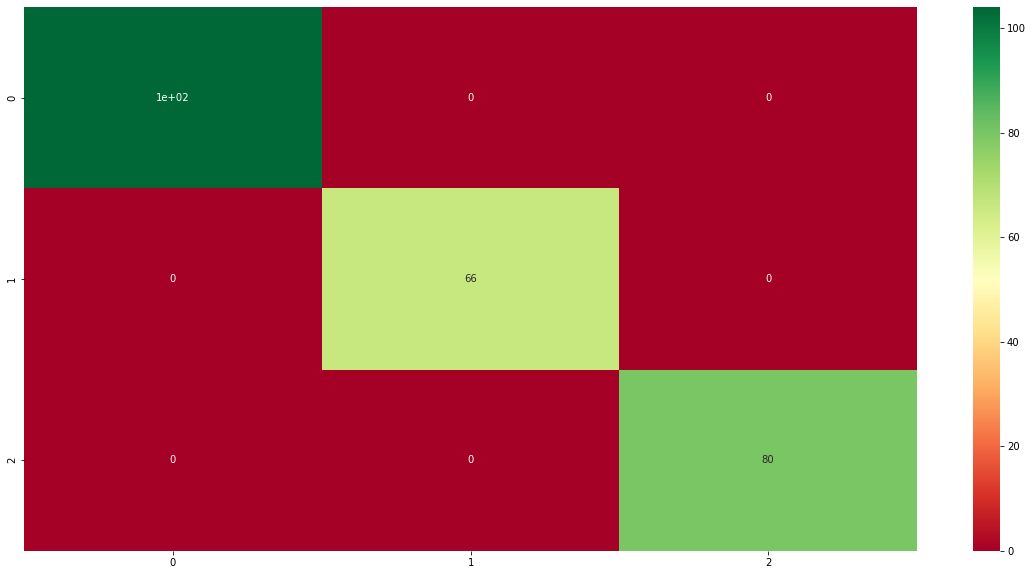

In [206]:
cm=confusion_matrix(y_test, dt_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [207]:
cr=classification_report(y_test, dt_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      1.00      1.00        66
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



<font color='blue'><h1>Random Forest Classifier</h1></font>

In [208]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [209]:
rf_train_pred=rf.predict(X_train)
rf_test_pred=rf.predict(X_test)
rf_train_pred=rf.predict(X_train)
rf_test_pred=rf.predict(X_test)
rf_train_accuracy=accuracy_score(y_train, rf_train_pred)
rf_test_accuracy=accuracy_score(y_test, rf_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", rf_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", rf_test_accuracy)

Training Accuracy of Logistic Regression Model is:  1.0
Testing Accuracy of Logistic Regression Model is:  1.0


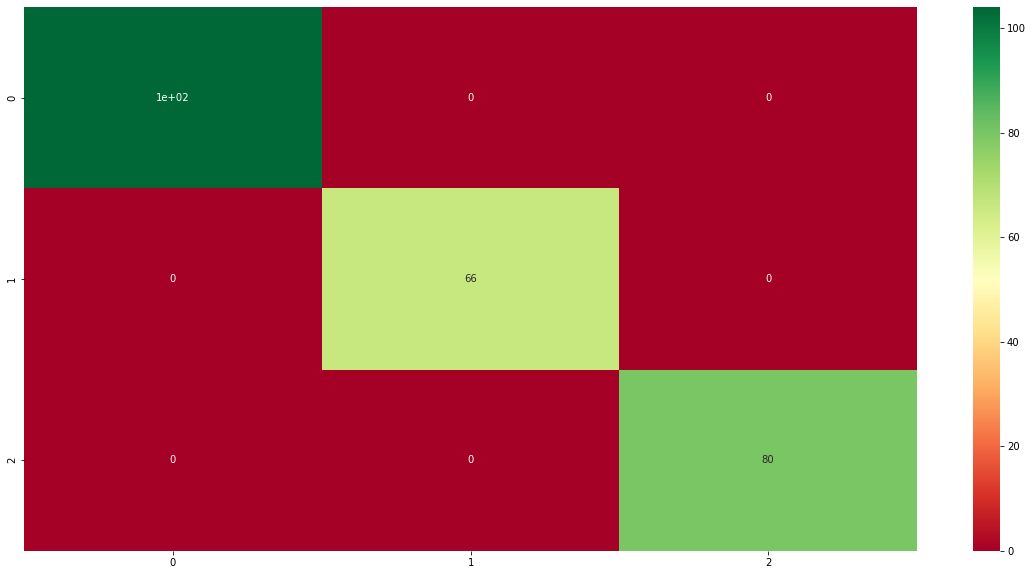

In [210]:
cm=confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [211]:
cr=classification_report(y_test, rf_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      1.00      1.00        66
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



<font color='blue'><h1>Gaussian NB Classifier</h1></font>

In [212]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [213]:
nb_train_pred=nb.predict(X_train)
nb_test_pred=nb.predict(X_test)
nb_train_pred=nb.predict(X_train)
nb_test_pred=nb.predict(X_test)
nb_train_accuracy=accuracy_score(y_train, nb_train_pred)
nb_test_accuracy=accuracy_score(y_test, nb_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", nb_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", nb_test_accuracy)

Training Accuracy of Logistic Regression Model is:  0.8906666666666667
Testing Accuracy of Logistic Regression Model is:  0.888


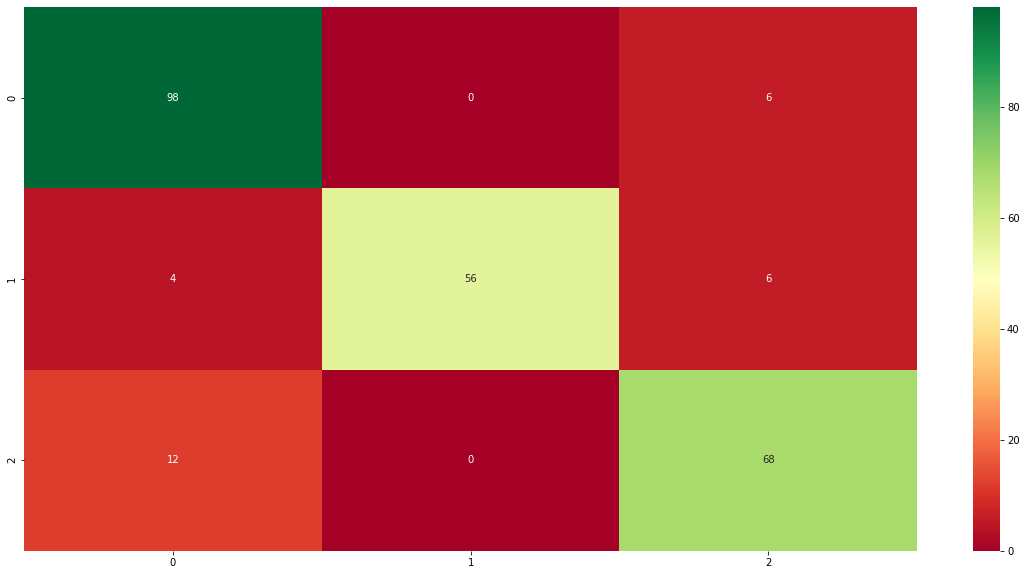

In [214]:
cm=confusion_matrix(y_test, nb_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [215]:
cr=classification_report(y_test, rf_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      1.00      1.00        66
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



<font color='blue'><h1>K Neighbors Classifier</h1></font>

In [216]:
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [217]:
kn_train_pred=kn.predict(X_train)
kn_test_pred=kn.predict(X_test)
kn_train_pred=kn.predict(X_train)
kn_test_pred=kn.predict(X_test)
kn_train_accuracy=accuracy_score(y_train, kn_train_pred)
kn_test_accuracy=accuracy_score(y_test, kn_test_pred)
print("Training Accuracy of Logistic Regression Model is: ", kn_train_accuracy)
print("Testing Accuracy of Logistic Regression Model is: ", kn_test_accuracy)

Training Accuracy of Logistic Regression Model is:  0.9986666666666667
Testing Accuracy of Logistic Regression Model is:  0.996


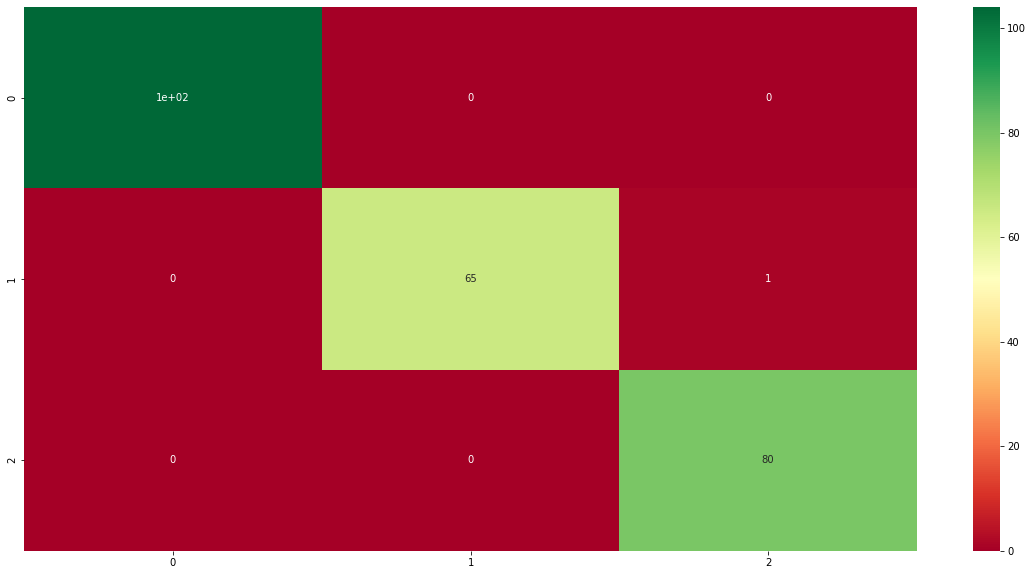

In [218]:
cm=confusion_matrix(y_test, kn_test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.show()

In [219]:
cr=classification_report(y_test, kn_test_pred)
print(cr)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       104
         Low       1.00      0.98      0.99        66
      Medium       0.99      1.00      0.99        80

    accuracy                           1.00       250
   macro avg       1.00      0.99      1.00       250
weighted avg       1.00      1.00      1.00       250



In [220]:
result=pd.DataFrame(
    columns=[
        [
            'model',
            'training Accuracy',
            'Testing Accuracy'
        ]
        ], 
        data=[
            [
                'Logistic Regression',
                lr_train_accuracy,
                lr_test_accuracy
            ],
            [
                'Support Vector Machine',
                sv_train_accuracy,
                sv_test_accuracy
            ],
            [
                'Decision Tree',
                dt_train_accuracy,
                dt_test_accuracy
            ],
            [
                'Random Forest',
                rf_train_accuracy,
                rf_test_accuracy
            ],
            [
                'Naive Bayes',
                nb_train_accuracy,
                nb_test_accuracy
            ],
            [
                'K Nearset Neighbor',
                kn_train_accuracy,
                kn_test_accuracy
            ],
            ]
        )
result

,model,training Accuracy,Testing Accuracy
0,Logistic Regression,0.997333,0.996
1,Support Vector Machine,0.972000,0.964
2,Decision Tree,1.000000,1.000
3,Random Forest,1.000000,1.000
4,Naive Bayes,0.890667,0.888
5,K Nearset Neighbor,0.998667,0.996
